<a href="https://colab.research.google.com/github/ritamsarkar2000/ML/blob/master/movie_review_text_classification_with_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info= True,
                          as_supervised= True)
train_data, test_data = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXZNLNS/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXZNLNS/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXZNLNS/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
encoder = info.features['text'].encoder
encoder.vocab_size

8185

In [4]:
sample = ' There is no shame in having mental illnesses or being different and you should love and be proud of yourself '  #sample string to see the encoder output
encoded_string = encoder.encode(sample)
print('the sample encoded string is :', encoded_string ,'\n and the real sample string is:', sample)

the sample encoded string is : [7961, 173, 9, 84, 2743, 11, 369, 3191, 905, 657, 112, 50, 139, 402, 5, 37, 180, 174, 5, 35, 6195, 7961, 6, 1445] 
 and the real sample string is:  There is no shame in having mental illnesses or being different and you should love and be proud of yourself 


In [5]:
#preparing the data

buffer_size = 10000
batch_size = 64
train_data = train_data.shuffle(buffer_size)
train_data = train_data.padded_batch(batch_size)

test_data = test_data.padded_batch(batch_size)

In [6]:
# creating the model

from tensorflow.keras import Sequential, layers

model = Sequential([layers.Embedding(encoder.vocab_size, 64),
                    layers.Bidirectional(layers.LSTM(64)),
                    layers.Dense(64, activation = 'relu'),
                    layers.Dense(1)
])

model.compile(optimizer= tf.keras.optimizers.Adam(1e-4),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
#training the model

history = model.fit(train_data,
          epochs = 10,
          validation_data= test_data,
          validation_steps = 30)

Epoch 1/10
391/391 [==============================] - 126s 322ms/step - loss: 0.6468 - accuracy: 0.5527 - val_loss: 0.4906 - val_accuracy: 0.7385
Epoch 2/10
391/391 [==============================] - 123s 315ms/step - loss: 0.3411 - accuracy: 0.8561 - val_loss: 0.3469 - val_accuracy: 0.8531
Epoch 3/10
391/391 [==============================] - 123s 315ms/step - loss: 0.2526 - accuracy: 0.9025 - val_loss: 0.3303 - val_accuracy: 0.8672
Epoch 4/10
391/391 [==============================] - 123s 314ms/step - loss: 0.2423 - accuracy: 0.9067 - val_loss: 0.3279 - val_accuracy: 0.8672
Epoch 5/10
391/391 [==============================] - 123s 314ms/step - loss: 0.1852 - accuracy: 0.9349 - val_loss: 0.3489 - val_accuracy: 0.8646
Epoch 6/10
391/391 [==============================] - 122s 312ms/step - loss: 0.1667 - accuracy: 0.9431 - val_loss: 0.3648 - val_accuracy: 0.8604
Epoch 7/10
391/391 [==============================] - 123s 314ms/step - loss: 0.1496 - accuracy: 0.9492 - val_loss: 0.3768 -

In [8]:
import matplotlib.pyplot as plt

In [9]:
def graph(history):
  plt.plot(history.history['accuracy'], 'r', label = 'training accuracy')
  plt.plot(history.history['val_accuracy'], 'b', label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(loc=0)
  plt.show()

  plt.plot(history.history['loss'], 'g', label = 'training loss')
  plt.plot(history.history['val_loss'], 'b', label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(loc= 0)
  plt.show()

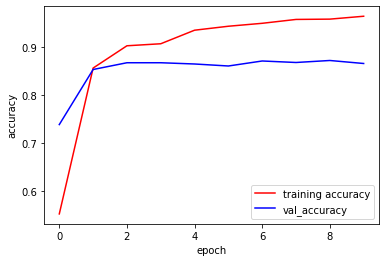

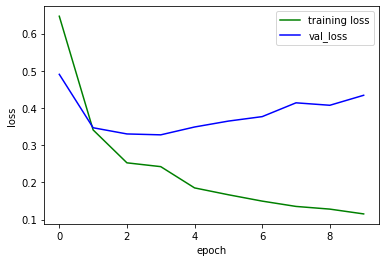

In [10]:
graph(history)

In [11]:
testloss, testaccu = model.evaluate(test_data)
print('test loss =' ,testloss, '\n test accuracy = ', testaccu*100, '%')

391/391 [==============================] - 47s 119ms/step - loss: 0.4452 - accuracy: 0.8575
test loss = 0.4452327787876129 
 test accuracy =  85.75199842453003 %


In [12]:
#stacking more lstm layers

model1 = Sequential([layers.Embedding(encoder.vocab_size, 64),
                    layers.Bidirectional(layers.LSTM(64, return_sequences= True)),
                    layers.Bidirectional(layers.LSTM(64)),
                    layers.Dense(64, activation = 'relu'),
                    layers.Dropout(0.6),
                    layers.Dense(1)
])

model1.compile(optimizer= tf.keras.optimizers.Adam(1e-4),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 697,025
Trainable params: 697,025
Non-trainable params: 0
________________________________________________

In [13]:
history = model1.fit(train_data,
          epochs = 10,
          validation_data= test_data,
          validation_steps = 30)

Epoch 1/10
391/391 [==============================] - 249s 637ms/step - loss: 0.6559 - accuracy: 0.5530 - val_loss: 0.4661 - val_accuracy: 0.7766
Epoch 2/10
391/391 [==============================] - 243s 622ms/step - loss: 0.3640 - accuracy: 0.8522 - val_loss: 0.3458 - val_accuracy: 0.8594
Epoch 3/10
391/391 [==============================] - 244s 623ms/step - loss: 0.2636 - accuracy: 0.9048 - val_loss: 0.4172 - val_accuracy: 0.8516
Epoch 4/10
391/391 [==============================] - 244s 625ms/step - loss: 0.2177 - accuracy: 0.9254 - val_loss: 0.3515 - val_accuracy: 0.8635
Epoch 5/10
391/391 [==============================] - 243s 622ms/step - loss: 0.1868 - accuracy: 0.9382 - val_loss: 0.3747 - val_accuracy: 0.8589
Epoch 6/10
391/391 [==============================] - 244s 625ms/step - loss: 0.1603 - accuracy: 0.9499 - val_loss: 0.4112 - val_accuracy: 0.8557
Epoch 7/10
391/391 [==============================] - 240s 614ms/step - loss: 0.1471 - accuracy: 0.9567 - val_loss: 0.7467 -

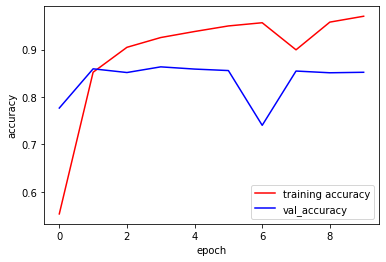

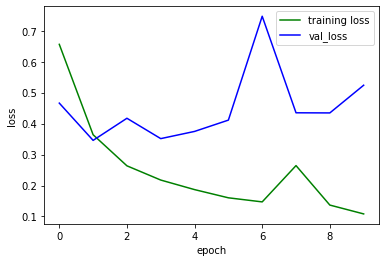

In [14]:
graph(history)

In [15]:
testloss, testaccu = model1.evaluate(test_data)
print('test loss =' ,testloss, '\n test accuracy = ', testaccu*100, '%')

391/391 [==============================] - 92s 234ms/step - loss: 0.5192 - accuracy: 0.8499
test loss = 0.5191594362258911 
 test accuracy =  84.99199748039246 %


In [24]:


def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [31]:
sample_ = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample, pad= True)
print(predictions)

[[-0.13734156]]


In [32]:
predictions = sample_predict(sample, pad= False)
print(predictions)

[[0.07293063]]


In [33]:
def sample_predict2(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model1.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [34]:
predictions = sample_predict2(sample, pad= True)
print(predictions)

[[1.1483284]]


In [35]:
predictions = sample_predict2(sample, pad= False)
print(predictions)

[[-0.7318241]]
